In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
DATA_FOLDER = '../data/'
DATA_ZIP = DATA_FOLDER + 'datasets.zip'

DATA_TRAIN_PATH = DATA_FOLDER + 'train.csv'
DATA_TEST_PATH = DATA_FOLDER + 'test.csv' 

# Load the training data

In [5]:
from proj1_helpers import *
from split_data import *
from data_processing import *

y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
Y_train, X_train, IDS_train, Y_test, X_test, IDS_test = clean_by_cat(y, tX, ids, y_test, tX_test, ids_test)

# Creating training and validation sets

In [4]:
split_ratio = 0.5
tX_train, tX_validation, y_train, y_validation = split_data(tX, y, split_ratio)
tX_train_clean, tX_validation_clean, y_train_clean, y_validation_clean = split_data(tX_clean, y_clean, split_ratio)

In [5]:
print("Raw set : ")
row_format = "{:<15}" * 3
print(row_format.format("", "Training", "Validation"))
print(row_format.format("Features", str(tX_train.shape), str(tX_validation.shape)))
print(row_format.format("Labels", str(y_train.shape), str(y_validation.shape)))

print("\nClean set : ")
row_format = "{:<15}" * 3
print(row_format.format("", "Training", "Validation"))
print(row_format.format("Features", str(tX_train_clean.shape), str(tX_validation_clean.shape)))
print(row_format.format("Labels", str(y_train_clean.shape), str(y_validation_clean.shape)))

Raw set : 
               Training       Validation     
Features       (125000, 30)   (125000, 30)   
Labels         (125000,)      (125000,)      

Clean set : 
               Training       Validation     
Features       (76828, 30)    (76827, 30)    
Labels         (76828,)       (76827,)       


# Testing every basic model on cleaned data

In [6]:
from pipeline import *
from cross_validation import find_best_parameter

### Gradient Descent

In [56]:
max_iters = 100
gamma = 0.1

for (y, x, _) in categories:
    weights, loss = model_data(y, x, 'gradient_descent', max_iters=max_iters, gamma=gamma)

    # Not compared with the not cleaned set, because it needs normalizing to work
    print("Training loss : {}".format(loss))

Training loss : 0.30374796224544304
Training loss : 0.36727619385427007
Training loss : 0.32700527708038984
Training loss : 0.3333933012101565


In [ ]:
gammas = np.logspace(-4, -0.5, 15)

for i in range(4):
    best_gamma, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'gradient_descent', 'gamma', gammas, max_iters=100)
    print(best_gamma, best_loss)

### Stochastic Gradient Descent

In [81]:
max_iters = 1000
gamma = 0.05

for i in range(4):
    weights, loss = model_data(y_clean_cat[i], tX_clean_cat[i], 'stochastic_gradient_descent', max_iters=max_iters, gamma=gamma, poly_exp=2)
    print("Training loss : {}".format(loss))

Training loss : 0.2957538979689135
Training loss : 0.33538545080474025
Training loss : 0.2951068354297638
Training loss : 0.3327053728390424


48903
16301
0.002658323620227776
48903
16301
-0.0023311453285074224
48903
16301
-0.0035580639224587207
48903
16301
0.003230885630738367
48903
16301
0.0027196695499253076
48903
16301
-0.0023720426149724805
48903
16301
-0.003598961208923779
48903
16301
0.003189988344273309
48903
16301
0.0028219127660878973
48903
16301
-0.0021062102529497695
48903
16301
-0.003414923419831073
48903
16301
0.002924155982250598
48903
16301
0.002801464122855424
48903
16301
-0.0004907674375805859
48903
16301
-0.004396458294992134
48903
16301
0.0022493507555774173
48903
16301
0.0029855019119481296
48903
16301
0.00022493507555776393
48903
16301
-0.0027196695499254187
48903
16301
-0.0010019835183936454
48903
16301
0.002699220906692834
48903
16301
0.0017585833179969423
48903
16301
-0.004191971862666954
48903
16301
-0.0011246753777887086
48903
16301
0.001819929247694363
48903
16301
0.0017585833179968313
48903
16301
-0.0007565997996032969
48903
16301
-0.002044864323252127
48903
16301
0.0027605668363904767
48903
16301

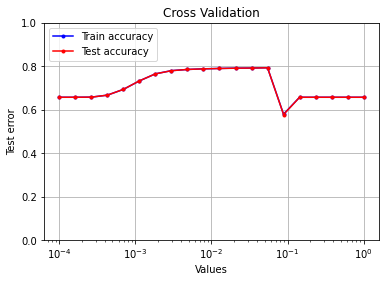

Best gamma is 0.05455594781168514 with loss 0.7920066253604073
40746
13582
-0.0040985618220193976
40746
13582
0.005522014430864308
40746
13582
-0.004883914985520099
40746
13582
0.0034604623766749665
40746
13582
-0.0041231041083787945
40746
13582
0.005595641289942499
40746
13582
-0.004883914985520099
40746
13582
0.0034113778039561726
40746
13582
-0.00400039267658181
40746
13582
0.005129337849113957
40746
13582
-0.004932999558238893
40746
13582
0.0035340892357531573
40746
13582
-0.002576940067736677
40746
13582
0.00527659156727045
40746
13582
-0.005546556717223705
40746
13582
0.003264124085799902
40746
13582
-0.000662641731703717
40746
13582
0.004883914985520099
40746
13582
-0.004343984685613367
40746
13582
0.0006380994453443201
40746
13582
-0.003288666372159299
40746
13582
0.004393069258332161
40746
13582
-0.00223334805870512
40746
13582
0.0021106366269081356
40746
13582
-0.005055710990035878
40746
13582
0.0051047955627545605
40746
13582
-0.0023806017768615018
40746
13582
0.004761203553

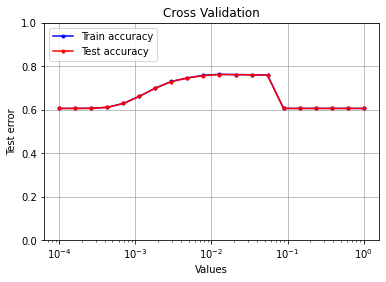

Best gamma is 0.012742749857031334 with loss 0.7610256221469591
23844
7948
0.001048481798356038
23844
7948
-0.001761449421238015
23844
7948
0.00482301627243753
23844
7948
-0.0020130850528434774
23844
7948
0.001048481798356038
23844
7948
0.00016775708773697495
23844
7948
0.003942291561818467
23844
7948
-0.00041939271934232636
23844
7948
0.0015098137896325525
23844
7948
-0.0015517530615668518
23844
7948
0.002851870491528241
23844
7948
-0.0009646032544874394
23844
7948
0.0012162388860929019
23844
7948
-0.0005032712632109249
23844
7948
0.0016775708773695275
23844
7948
-0.0010904210702902262
23844
7948
0.0024324777721859148
23844
7948
-0.0011323603422244144
23844
7948
0.0027260526757255654
23844
7948
-0.00037745344740813813
23844
7948
-0.0036067773863445174
23844
7948
0.0008387854386847637
23844
7948
0.0015098137896326635
23844
7948
0.004361684281160794
23844
7948
-0.0038164737460156806
23844
7948
0.003145445395068003
23844
7948
-0.0022227814125146406
23844
7948
0.0030615668511995153
23844


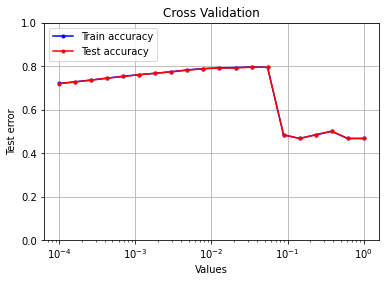

Best gamma is 0.03359818286283781 with loss 0.7948540513336689
9498
3166
0.002842703727100382
9498
3166
0.002842703727100382
9498
3166
0.00494841019161929
9498
3166
-0.010633817645820165
9498
3166
0.002842703727100382
9498
3166
0.002842703727100382
9498
3166
0.00494841019161929
9498
3166
-0.010633817645820165
9498
3166
0.002842703727100382
9498
3166
0.002842703727100382
9498
3166
0.00494841019161929
9498
3166
-0.010633817645820165
9498
3166
0.002842703727100382
9498
3166
0.002842703727100382
9498
3166
0.00494841019161929
9498
3166
-0.010633817645820165
9498
3166
0.002842703727100382
9498
3166
0.002842703727100382
9498
3166
0.00494841019161929
9498
3166
-0.010633817645820165
9498
3166
0.002842703727100382
9498
3166
0.002842703727100382
9498
3166
0.00494841019161929
9498
3166
-0.010633817645820165
9498
3166
0.002842703727100382
9498
3166
0.002210991787744865
9498
3166
0.004316698252263551
9498
3166
-0.00905453779743104
9498
3166
0.0027374184038745364
9498
3166
0.0013687092019372127
9498


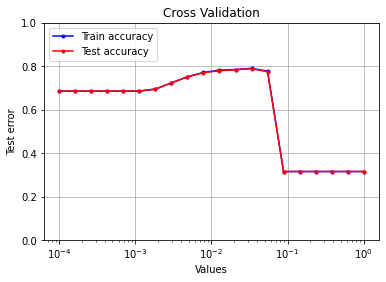

Best gamma is 0.03359818286283781 with loss 0.7876658243840808


In [19]:
gammas = np.logspace(-4, 0, 20)

for i in range(4):
    best_gamma, best_loss = find_best_parameter(Y_train[i], X_train[i], 'stochastic_gradient_descent', 'gamma', gammas, max_iters=100, poly_exp=2)
    print("Best gamma is {} with loss {}".format(best_gamma, best_loss))

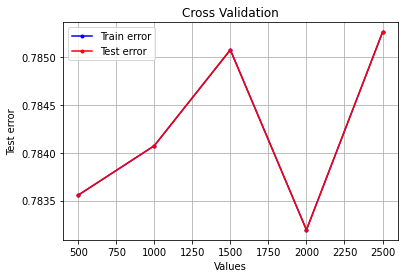

Best max_iters is 2000 with loss 0.7831932601271905


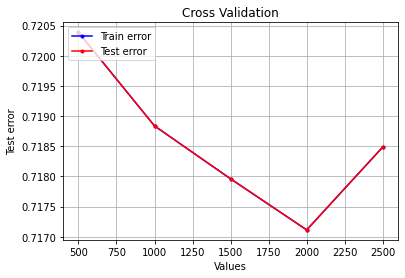

Best max_iters is 2000 with loss 0.7171133362784077


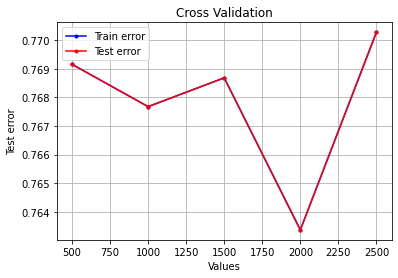

Best max_iters is 2000 with loss 0.7633681429290387


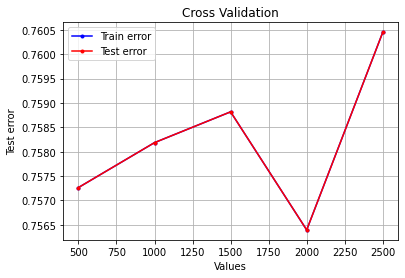

Best max_iters is 2000 with loss 0.756396083385976


In [10]:
max_iter_values = (np.arange(5)+1)*500

for i in range(4):
    best_iter, best_loss = find_best_parameter(Y_train[i], X_train[i], 'stochastic_gradient_descent', 'max_iters', max_iter_values, logspace=False, gamma=0.3, poly_exp=1)
    print("Best max_iters is {} with loss {}".format(best_iter, best_loss))

In [8]:
expansion_values = [1, 2, 3]
for i in range(4):
    best_iter, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'stochastic_gradient_descent', 'poly_exp', expansion_values, logspace=False, k_fold=4, max_iters=100, gamma=0.03)
    print("Best max_iters is {} with loss {}".format(best_iter, best_loss))

NameError: name 'y_clean_cat' is not defined

### Least Squares

Rank of the matrix is 19, for D = 19
Rank of the matrix is 19, for D = 19
Rank of the matrix is 19, for D = 19
Rank of the matrix is 19, for D = 19
Rank of the matrix is 19, for D = 19
Rank of the matrix is 19, for D = 19
Rank of the matrix is 19, for D = 19
Rank of the matrix is 19, for D = 19
Rank of the matrix is 37, for D = 37
Rank of the matrix is 37, for D = 37
Rank of the matrix is 37, for D = 37
Rank of the matrix is 37, for D = 37
Rank of the matrix is 54, for D = 55
Rank of the matrix is 54, for D = 55
Rank of the matrix is 54, for D = 55
Rank of the matrix is 54, for D = 55
Rank of the matrix is 70, for D = 73
Rank of the matrix is 70, for D = 73
Rank of the matrix is 70, for D = 73
Rank of the matrix is 70, for D = 73
Rank of the matrix is 87, for D = 91
Rank of the matrix is 87, for D = 91
Rank of the matrix is 87, for D = 91
Rank of the matrix is 87, for D = 91
Rank of the matrix is 103, for D = 109
Rank of the matrix is 103, for D = 109
Rank of the matrix is 103, for D =

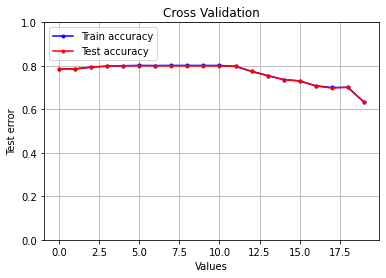

Best degree is 5 with loss 0.8010091405435249
Rank of the matrix is 23, for D = 23
Rank of the matrix is 23, for D = 23
Rank of the matrix is 23, for D = 23
Rank of the matrix is 23, for D = 23
Rank of the matrix is 23, for D = 23
Rank of the matrix is 23, for D = 23
Rank of the matrix is 23, for D = 23
Rank of the matrix is 23, for D = 23
Rank of the matrix is 45, for D = 45
Rank of the matrix is 45, for D = 45
Rank of the matrix is 45, for D = 45
Rank of the matrix is 45, for D = 45
Rank of the matrix is 67, for D = 67
Rank of the matrix is 67, for D = 67
Rank of the matrix is 67, for D = 67
Rank of the matrix is 67, for D = 67
Rank of the matrix is 87, for D = 89
Rank of the matrix is 86, for D = 89
Rank of the matrix is 87, for D = 89
Rank of the matrix is 87, for D = 89
Rank of the matrix is 107, for D = 111
Rank of the matrix is 107, for D = 111
Rank of the matrix is 107, for D = 111
Rank of the matrix is 107, for D = 111
Rank of the matrix is 127, for D = 133
Rank of the matrix 

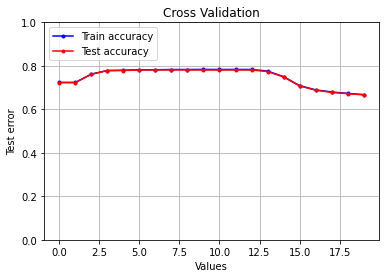

Best degree is 7 with loss 0.7813650419673097
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 59, for D = 59
Rank of the matrix is 59, for D = 59
Rank of the matrix is 59, for D = 59
Rank of the matrix is 59, for D = 59
Rank of the matrix is 88, for D = 88
Rank of the matrix is 88, for D = 88
Rank of the matrix is 88, for D = 88
Rank of the matrix is 88, for D = 88
Rank of the matrix is 117, for D = 117
Rank of the matrix is 117, for D = 117
Rank of the matrix is 117, for D = 117
Rank of the matrix is 117, for D = 117
Rank of the matrix is 144, for D = 146
Rank of the matrix is 144, for D = 146
Rank of the matrix is 144, for D = 146
Rank of the matrix is 144, for D = 146
Rank of the matrix is 173, for D = 175
Rank of the

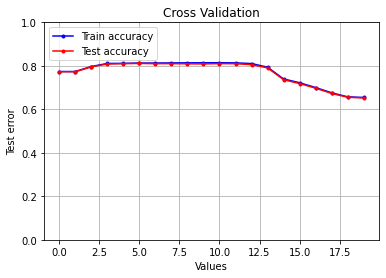

Best degree is 5 with loss 0.8111160040261701
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 59, for D = 59
Rank of the matrix is 59, for D = 59
Rank of the matrix is 59, for D = 59
Rank of the matrix is 59, for D = 59
Rank of the matrix is 88, for D = 88
Rank of the matrix is 88, for D = 88
Rank of the matrix is 88, for D = 88
Rank of the matrix is 88, for D = 88
Rank of the matrix is 117, for D = 117
Rank of the matrix is 117, for D = 117
Rank of the matrix is 117, for D = 117
Rank of the matrix is 117, for D = 117
Rank of the matrix is 145, for D = 146
Rank of the matrix is 145, for D = 146
Rank of the matrix is 145, for D = 146
Rank of the matrix is 145, for D = 146
Rank of the matrix is 174, for D = 175
Rank of the

In [ ]:
expansion_values = np.arange(20)

for i in range(4):
    best_iter, best_loss = find_best_parameter(Y_train[i], X_train[i], 'least_squares', 'poly_exp', expansion_values, logspace=False)
    print("Best degree is {} with loss {}".format(best_iter, best_loss))

### Ridge Regression

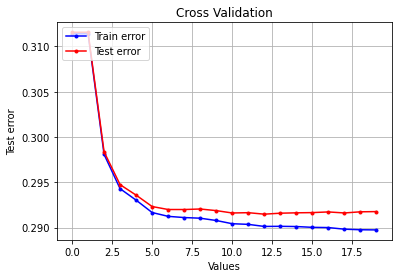

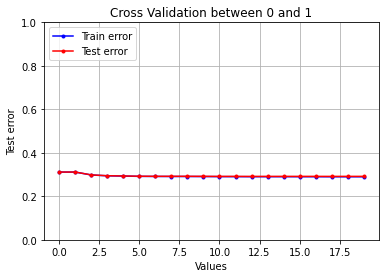

Best max_iters is 12 with loss 0.2914838412397338


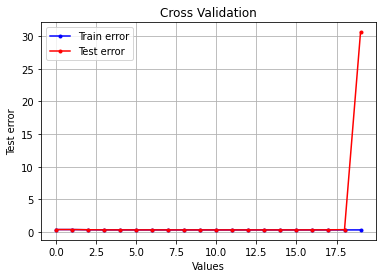

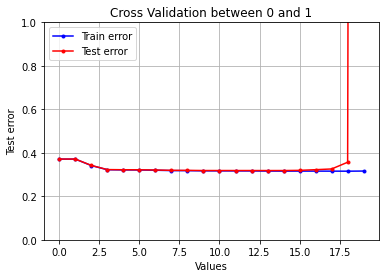

Best max_iters is 13 with loss 0.3184957079777266


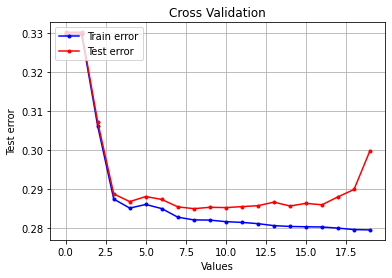

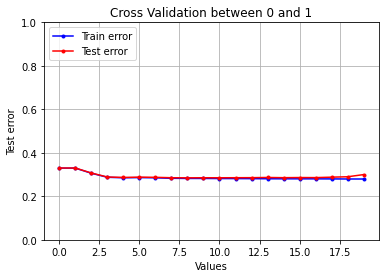

Best max_iters is 8 with loss 0.2850142723438653


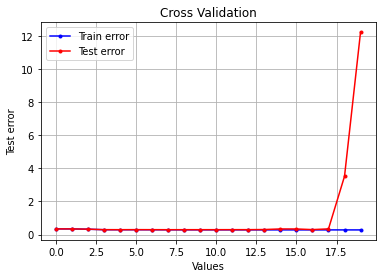

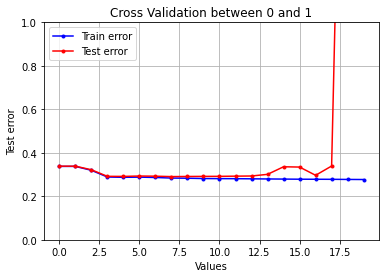

Best max_iters is 7 with loss 0.29066624270568825


In [110]:
expansion_values = np.arange(20)
for i in range(4):
    best_iter, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'ridge_regression', 'poly_exp', expansion_values, logspace=False, lambda_=0.1)
    print("Best max_iters is {} with loss {}".format(best_iter, best_loss))

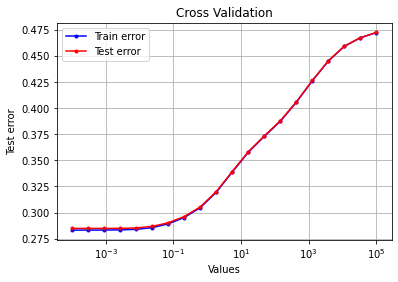

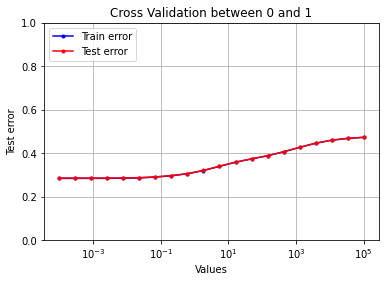

Best lambda is 0.0008858667904100823 with loss 0.2849253671980902


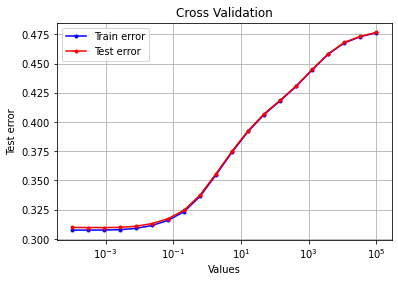

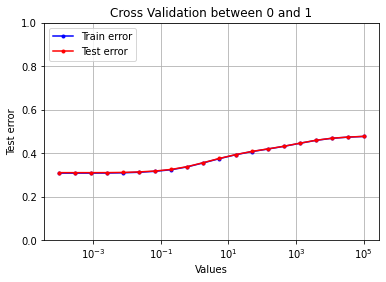

Best lambda is 0.0008858667904100823 with loss 0.30976325864850696


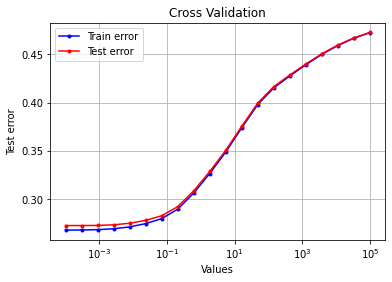

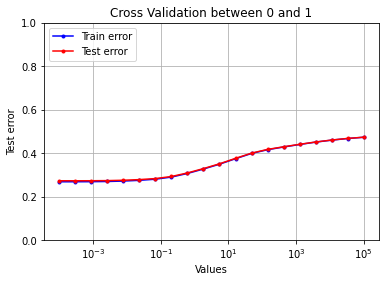

Best lambda is 0.00029763514416313193 with loss 0.2724190573525308


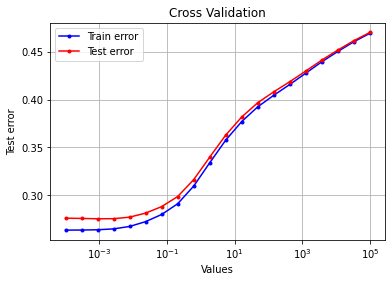

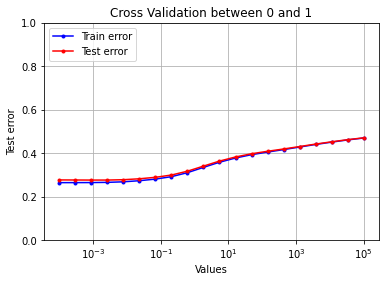

Best lambda is 0.0008858667904100823 with loss 0.2756265275042834


In [111]:
lambdas = np.logspace(-4, 5, 20)

for i in range(4):
    best_lambda, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'ridge_regression', 'lambda_', lambdas, poly_exp=8)
    print("Best lambda is {} with loss {}".format(best_lambda, best_loss))

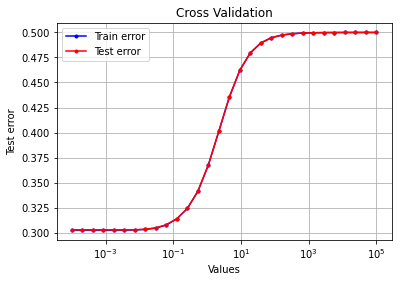

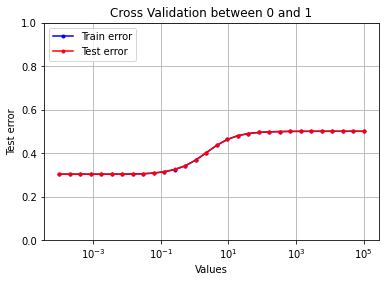

Best lambda is 0.00020433597178569417 with loss 0.3027657391767248


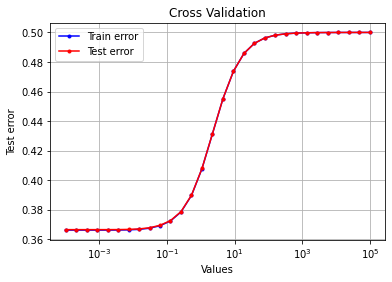

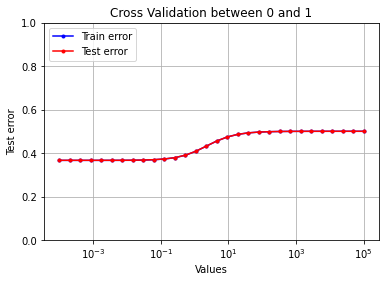

Best lambda is 0.00020433597178569417 with loss 0.3665469595290073


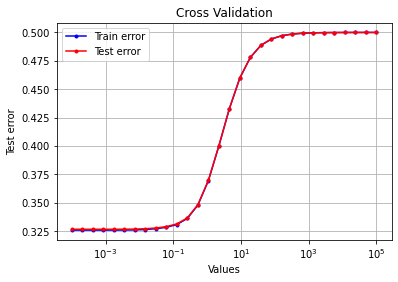

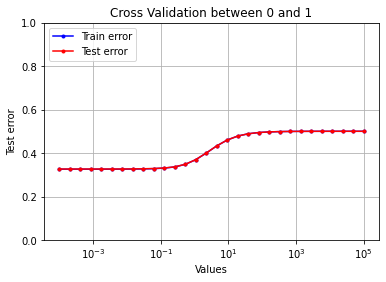

Best lambda is 0.00041753189365604 with loss 0.3264665733830705


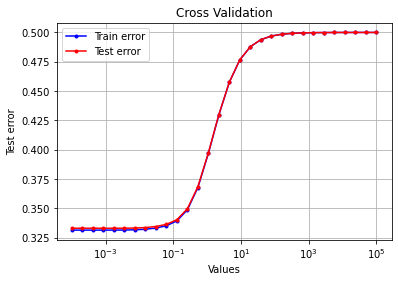

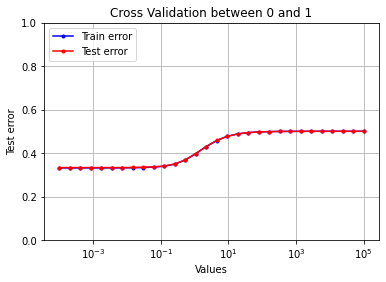

Best lambda is 0.0008531678524172815 with loss 0.33306854313108986


In [112]:
lambdas = np.logspace(-4, 5, 30)

for i in range(4):
    best_lambda, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'ridge_regression', 'lambda_', lambdas, poly_exp=1)
    print("Best lambda is {} with loss {}".format(best_lambda, best_loss))

### Logistic Regression

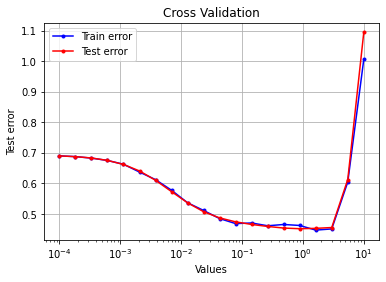

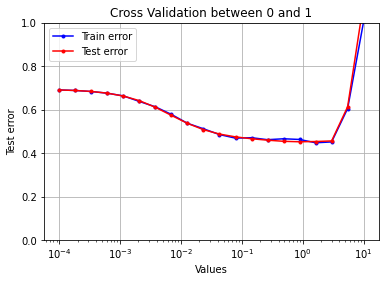

Best gamma is 0.8858667904100823 with loss 0.45171579726296684


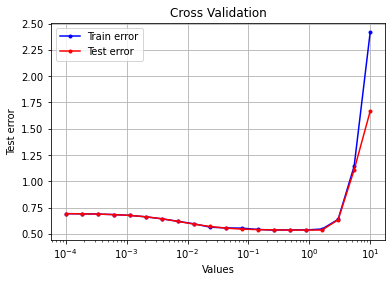

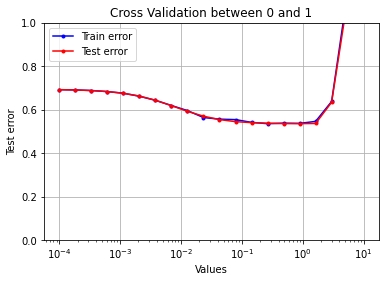

Best gamma is 0.8858667904100823 with loss 0.5352260276629419


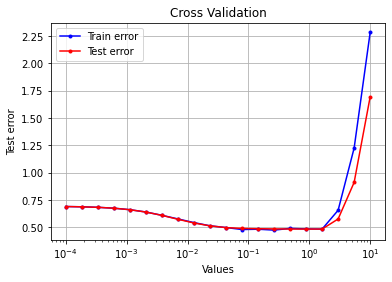

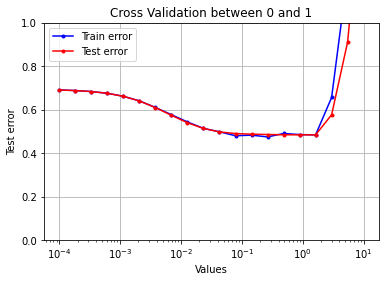

Best gamma is 0.8858667904100823 with loss 0.483538878809359


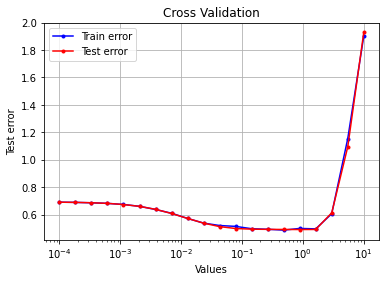

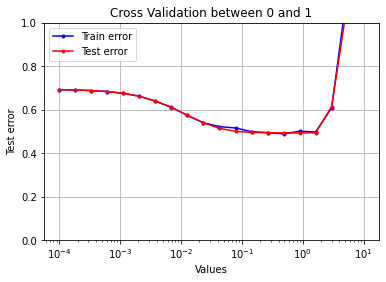

Best gamma is 0.8858667904100823 with loss 0.492200576011202


In [113]:
gammas = np.logspace(-4, 1, 20)

for i in range(4):
    best_gamma, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'logistic_regression', 'gamma', gammas, max_iters=150, poly_exp=1)
    print("Best gamma is {} with loss {}".format(best_gamma, best_loss))

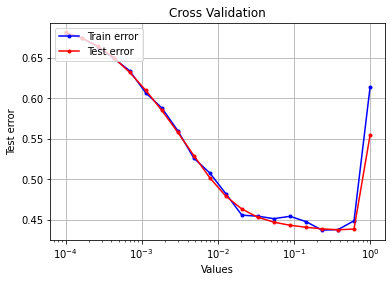

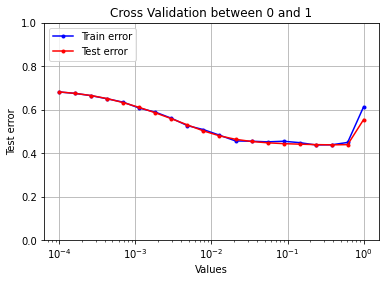

Best gamma is 0.3792690190732246 with loss 0.4375857596691979


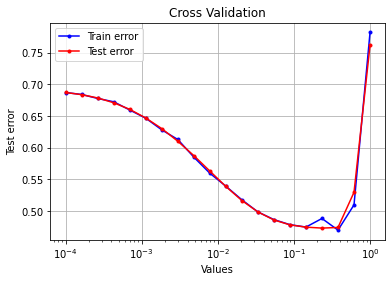

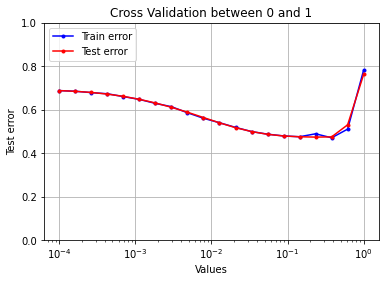

Best gamma is 0.23357214690901212 with loss 0.47325151349732214


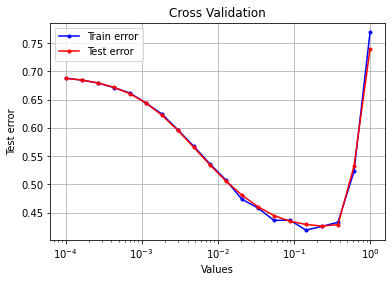

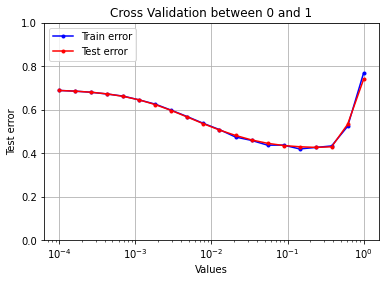

Best gamma is 0.23357214690901212 with loss 0.4259628914901804


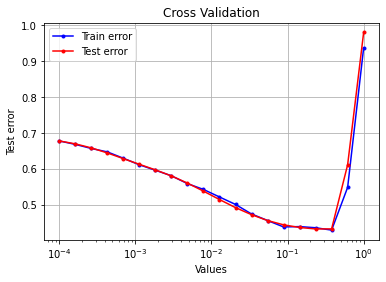

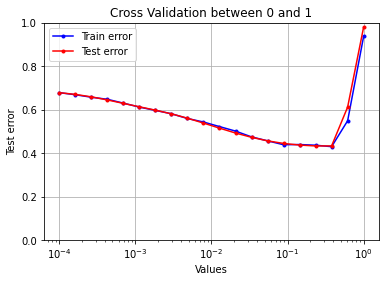

Best gamma is 0.23357214690901212 with loss 0.43253834547789594


In [114]:
gammas = np.logspace(-4, 0, 20)

for i in range(4):
    best_gamma, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'logistic_regression', 'gamma', gammas, max_iters=150, poly_exp=2)
    print("Best gamma is {} with loss {}".format(best_gamma, best_loss))

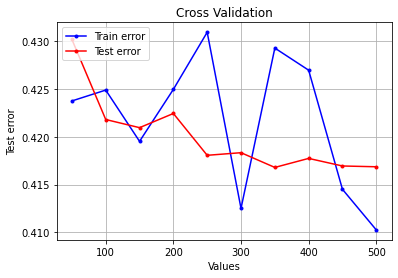

Best max_iters is 350 with loss 0.4167930162264529


In [322]:
iters = (np.arange(10)+1)*50

best_iter, best_loss = find_best_parameter(y_clean, tX_clean, 'logistic_regression', 'max_iters', iters, logspace=False, gamma=0.15, poly_exp=2)
print("Best max_iters is {} with loss {}".format(best_iter, best_loss))

### Penalized Logistic Regression

C:\Users\Moi\Desktop\Desktop\EPFL\Master\MA1\CS-433 - Machine Learning\CS-433-machine-learning\project1\scripts\logistic_regression.py:7: RuntimeWarning: overflow encountered in exp
  inv_exp = np.exp(-t)
C:\Users\Moi\Desktop\Desktop\EPFL\Master\MA1\CS-433 - Machine Learning\CS-433-machine-learning\project1\scripts\costs.py:28: RuntimeWarning: overflow encountered in exp
  sum_logs = np.log(np.exp(prediction) + 1).sum()


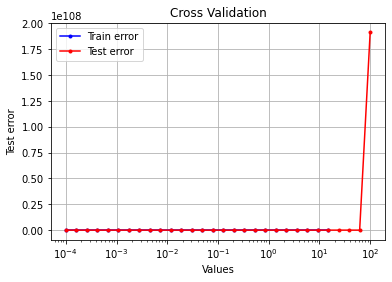

Best lambda is 0.0001 with loss 0.4240364250114062


In [329]:
lambdas = np.logspace(-4, 2, 30)

best_lambda, best_loss = find_best_parameter(y_clean, tX_clean, 'regularized_logistic_regression', 'lambda_', lambdas, max_iters=150, gamma=0.1, poly_exp=2)
print("Best lambda is {} with loss {}".format(best_lambda, best_loss))

## Generate predictions and save ouput in csv format for submission:

In [270]:
#This enable to run all cells without running this one when unnecessary
if True :
    y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
    y_test_clean, tX_test_clean, ids_test_clean = clean_test(y_test, tX_test, ids_test)
    tX_test_clean_poly = build_poly_2D(tX_test_clean, 2)
    OUTPUT_PATH = DATA_FOLDER + 'submission.csv' 
    if True: ## Only for logistic regression, we will do something nice later
        y_pred = predict_labels_logistic(weights_clean, tX_test_clean_poly)
    else:
        y_pred = predict_labels(weights, tX_test_clean_poly)
    create_csv_submission(ids_test_clean, y_pred, OUTPUT_PATH)
else :
    print("Change False to True to generate prediction")

ValueError: shapes (568238,87) and (90,) not aligned: 87 (dim 1) != 90 (dim 0)

In [25]:
def model_accuracy(weights, tX, correct_labels, logistic=False):
    if logistic :
        pred = predict_labels_logistic(weights, tX)
    else :
        pred = predict_labels(weights, tX)
    compare_array = (pred == correct_labels)
    return np.count_nonzero(compare_array)/len(compare_array)
    

In [26]:
#model_accuracy testing
weights, loss = model_data(y_train_clean, tX_train_clean, 'stochastic_gradient_descent', max_iters=180, gamma=0.24, poly_exp=2)
tX_poly = build_poly_2D(tX_validation_clean, 2)
print(model_accuracy(weights, tX_poly, y_validation_clean))

0.6941179533237013
